##**IBM EMPLOYEE ATTRIBUTION**

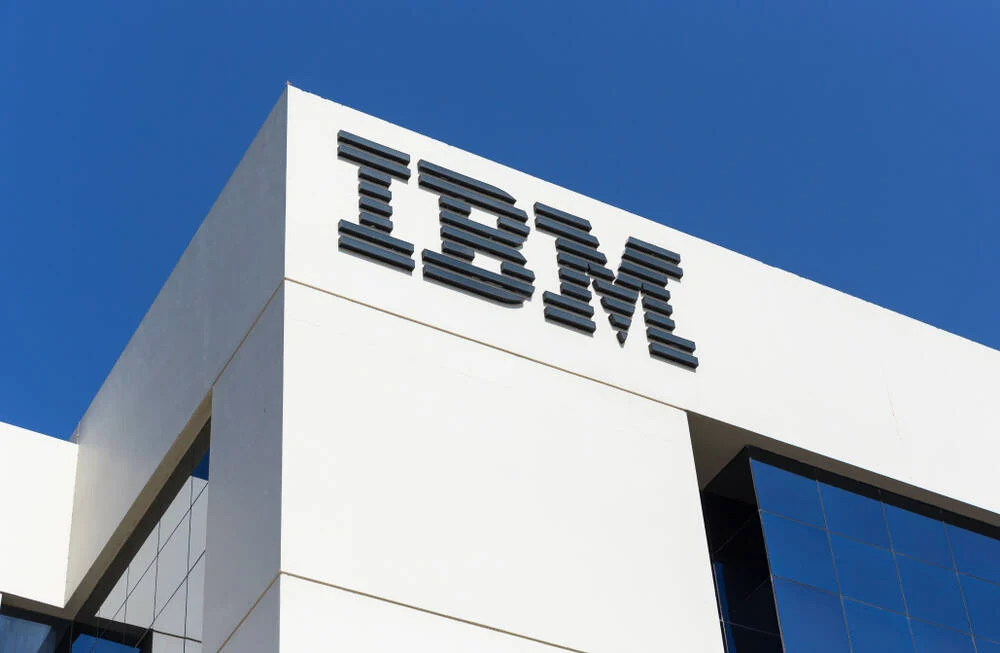

# **TABLE OF CONTENT**



1.   OVERVIEW
> 1.1 DATA DESCRIPTION
2.   ARTILLERIES
> 2.0 IMPORT LIBRARIES<br> 2.1 LOAD DATA SET 
3. EDA 
> 3.1 DATA CLEANING<BR> 3.2 DATA VISUALIZATION<BR>

# **1.0 OVERVIEW**

The key to success in any organization is attracting and retaining top talent. As an data analyst, one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify the factors contributing to employee attrittion, find the relationship between education of employees and their monthly income, see the effect of age on attrition, check if income is the main factor for employee attrition and know how work-life balance impact the overall attrition rate so as to improve these factors to prevent loss of good people in the company.

## 1.1 **DATA DESCRIPTTION**


In this Dataset, we have factors that could contribute to employee attrition such as Age, Business Travel, Daily Rate, Department, Distance From Home, Education, Education Field, Employee Count, Employee Number, Environment Satisfaction, Gender, Hourly Rate,
Job Involvement, Job Level, Job Role, Job Satisfaction,
Marital Status, Monthly Income, Monthly Rate, Number of Companies Worked, Over18, OverTime, Percent Salary Hike, Performance Rating, Relationship Satisfaction, Standard Hours, Stock Option Level, Total Working Years, Training Times Last Year, Work Life Balance,
Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager.

Dataset Glossary (Column-wise)

* Age
* Business Travel
* Daily Rate
* Department
* Distance From Home
* Education
* Education Field
* Employee Count
* Employee Number
* Environment Satisfaction
* Gender
* Hourly Rate
* Job Involvement
* Job Level
* Job Role
* Job Satisfaction
* Marital Status
* Monthly Income
* Monthly Rate
* Number of Companies Worked
* Over18
* Over Time
* Percent Salary Hike
* Performance Rating
* Relationship Satisfaction
* Standard Hours
* Stock Option Level
* Total Working Years
* Training Times Last Year
* Work Life Balance
* Years At Company
* Years In Current Role
* Years Since Last Promotion
* Years With Current Manager

# 2.0 **IMPORT LIBRARIES**

In [ ]:
# Import SQLite and other libraries
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Check if package installed successfully
print("SQLite imported successfully")

SQLite imported successfully


# 2.1 **LOAD DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attr_data.db to attr_data.db


In [ ]:
# Create connection
conn = sqlite3.connect("attr_data.db")


query = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
cursor = conn.cursor()

# Execute query
data = cursor.execute(query)

# View result
query_result = data.fetchall()
query_result

[('attrition_records',), ('sqlite_sequence',)]

In [ ]:
# Assigning a varialbe to the query

df=pd.read_sql_query(query,conn)


In [ ]:
# To view the names
df.head()

,name
0,attrition_records
1,sqlite_sequence


In [ ]:
# Create connection
conn = sqlite3.connect("attr_data.db")




query = """
SELECT *
FROM sqlite_sequence
"""
cursor = conn.cursor()

# Execute query
data = cursor.execute(query)

# View result
query_result = data.fetchall()
query_result

[('attrition_records', 1470)]

In [ ]:
# Assigning the dataset to a variable named ibm_attr

ibm_attr = pd.read_sql_query("SELECT * FROM attrition_records",conn)

In [ ]:
# To view the first 5 rows of the dataset

ibm_attr.head() 

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


We have successfully load our data set. We will move to the next phase of the project which is the Exploratory Data Analysis and Data Cleaning.

# 3.0 **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


# 3.1 **DATA CLEANING**

In [ ]:
# To view the shape (number or rows and columns) in the dataset

ibm_attr.shape 

(1470, 36)


The dataset used has <b>1470</b> rows and <b>36</b> columns

In [ ]:
# To view the different columns in the dataset

ibm_attr.columns 

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## **Checking for Missing Values**

In [ ]:
# To get more precise information about the dataset if there is a null value

ibm_attr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [ ]:
# To get the suummation of all null values

ibm_attr.isnull().sum()  

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

There is no null or missing value in the dataset

In [ ]:
# To get the summary of the desciptive statistics of the dataset

ibm_attr.describe()  

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
ibm_attr.kurtosis() # To get the kurtosis of the dataset

<ipython-input-15-a033ddd4b1a3>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ibm_attr.kurtosis() # To get the kurtosis of the dataset


id                         -1.200000
Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EmployeeNumber             -1.223179
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
d

A positive value for the kurtosis indicates a distribution more peaked than normal and a negative kurtosis indicates a shape flatter than normal.

In [ ]:
ibm_attr.skew()  # To get the skewness of the dataset

<ipython-input-16-71c9013661a8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ibm_attr.skew()  # To get the skewness of the dataset


id                          0.000000
Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

**SUMMARY OF THE SKEWNESS OF THE DATASET**

The features Age and Work-life balance are Fairly symmetrical.  Education and Job Satisfaction are moderately skewed in a negative direction. Distance from home and Percentage Salary Hike are moderately skewed in a positive direction. Monthly Income, Job Level, Number of Company Worked, Years at Company, Year Since Last Promotion and Performance Rating are highly skewed positively.  

## **ANALYSIS**
Analysing the factors behind employee attrition

In [ ]:
ibm_attr.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
ibm_attr.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Making a copy of the dataframe

ibm_attr_2 = ibm_attr.copy()
ibm_attr_2.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# To covert Yes to 1 and No to 2 in the Attrition column

ibm_attr_2["Attrition"].replace(["Yes","No"],[1,2],inplace=True)
ibm_attr_2.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,2,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,2,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


# 3.2 **DATA VISUALISATION**

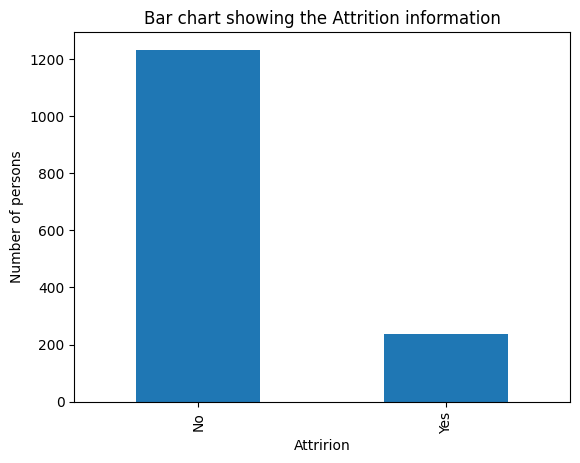

In [ ]:
# Create a histogram for the yes/no column
yes_no_counts = ibm_attr["Attrition"].value_counts()
yes_no_counts.plot(kind="bar")

# Add labels and title to the plot
plt.xlabel("Attririon")
plt.ylabel("Number of persons")
plt.title("Bar chart showing the Attrition information");

The figure above shows the histogram of Number of persons on the Y-axis and Yes or No on the X-axis.

In [ ]:
# Dropping EmployeeCount and StandardHours column

ibm_attr_2.drop(columns=["EmployeeCount","StandardHours"],axis = 1, inplace=True)
ibm_attr_2.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,2,49,2,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,4,33,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,5,27,2,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2


<ipython-input-23-4e71a7b1d1cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res = sns.heatmap(ibm_attr_2.corr(), annot=True, fmt = ".3f")


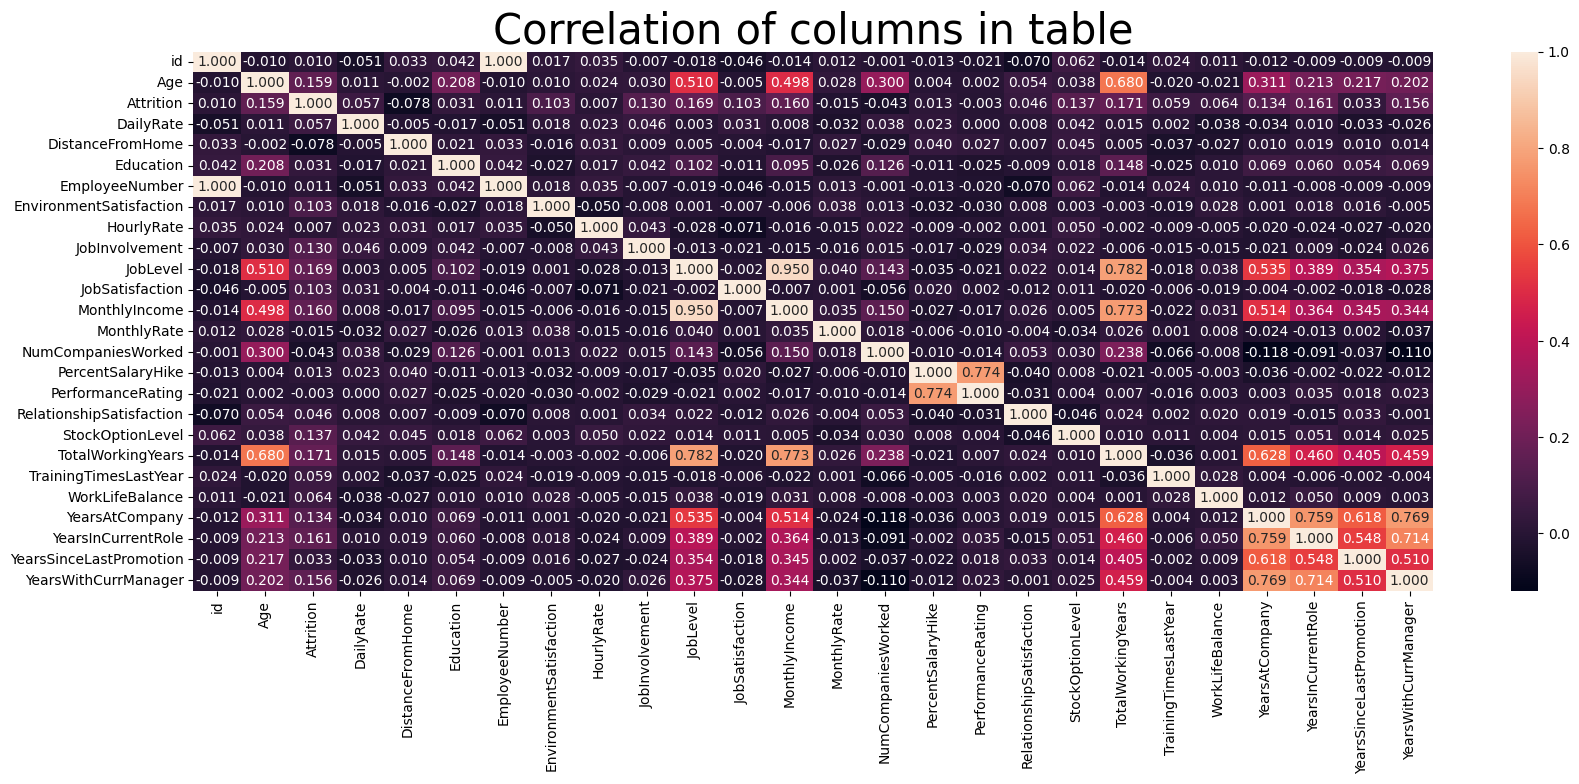

In [ ]:
# representing correlation in heatmap

plt.figure(figsize=[20,7])
res = sns.heatmap(ibm_attr_2.corr(), annot=True, fmt = ".3f")
plt.title ("Correlation of columns in table", fontsize = 30);

The figure above shows the correlation heatmap of the dataframe.

In [ ]:
#representing correlation in tabular format
ibm_attr_2.corr()

<ipython-input-24-d18b1efcb4c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ibm_attr_2.corr()


,id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,0.010369,-0.051484,0.032928,0.041901,0.999906,0.017424,0.034754,-0.007105,...,-0.020675,-0.069654,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.010369,0.159205,1.000000,0.056652,-0.077924,0.031373,0.010577,0.103369,0.006846,0.130016,...,-0.002889,0.045872,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
DailyRate,-0.051484,0.010661,0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,0.999906,-0.010145,0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


The figure above is the Correlation table showing the correlation of the dataframe.

From the correlation table above, the factors with the highest correlation value with Attrition to four decimal places are TotalWorkingYears with 0.1710, JobLevel with 0.1691, YearsInCurrentRole with 0.1605 and MonthlyIncome with 0.1598. The concludes that, the top three factors contributing to Employee Atrrition are;
1. Total Working Years (0.1710)
2. Job Level (0.1691)
3. Years In Current Role (0.1605)

**DETERMINING THE RELATIONSHIP BETWEEN EDUCATION AND MONTHLY INCOME.**

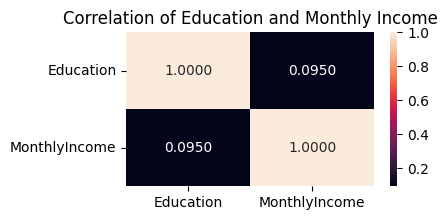

In [ ]:
# To get the relationship between monthly income and Education 

plt.figure(figsize=[4,2])
sns.heatmap(ibm_attr_2[['Education','MonthlyIncome']].corr(), annot=True, fmt = ".4f")
plt.title ("Correlation of Education and Monthly Income");

The figure above shows the relationship/correlation between Monthly income and Education. The correlation value is 0.0950, which means both factors are highly correlated. It also means that there is a significant relationship between both factors, that is as Education level increases, the Monthly income also increases.

**CHECKING THE EFFECT OF AGE ON ATTRITION**

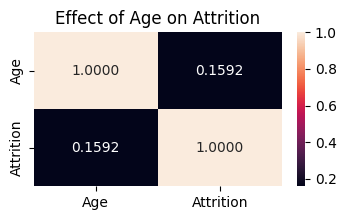

In [ ]:
# To get the correlation between Age and Attrition

plt.figure(figsize=[4,2])
sns.heatmap(ibm_attr_2[['Age','Attrition']].corr(), annot=True, fmt = ".4f")
plt.title ("Effect of Age on Attrition");

The figure above shows the correlation between Age and Attrition. The correlation value is 0.1592 which means Age has strong effect on the attrition.

**CHECKING IF INCOME IS THE MAIN FACTOR IN EMPLOYEE ATTRITION**

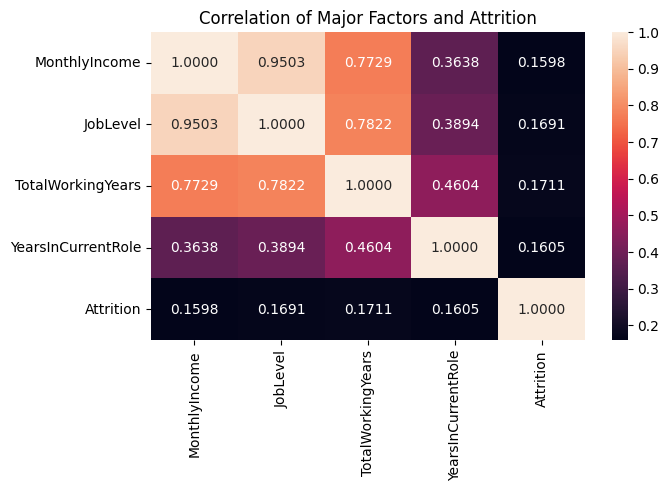

In [ ]:

#4. Income is not the main factor in Employee attrition 

plt.figure(figsize=[7,4])
sns.heatmap(ibm_attr_2[['MonthlyIncome','JobLevel','TotalWorkingYears','YearsInCurrentRole','Attrition']].corr(), annot=True, fmt = ".4f")
plt.title ("Correlation of Major Factors and Attrition");

The figure above shows the correlation between attrition and the Major factors that could cause Employee Attrition. 

**IMPACT OF WORK LIFE BALANCE ON ATTRITION RATE**

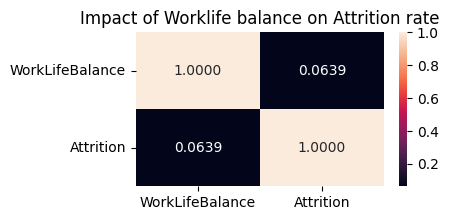

In [33]:
# Correlation between WorkLifeBalance and Attrition

plt.figure(figsize=[4,2])
sns.heatmap(ibm_attr_2[['WorkLifeBalance','Attrition']].corr(), annot=True, fmt = ".4f")
plt.title ("Impact of Worklife balance on Attrition rate");

The figure above shows the correlation between Attrition and Work Life Balance. The correlation value is 0.0639. It shows that Worklife balance have little impact on overall attrition rate.